<a href="https://colab.research.google.com/github/HarikrishnaYashoda/Regression--price-pridiction/blob/main/Price_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration**

In [ ]:
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample.csv")

In [ ]:
df.head(5)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.columns

Index(['loc1', 'loc2', 'para1', 'dow', 'para2', 'para3', 'para4', 'price'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


**Data Manipulation**

In [ ]:
df["loc1"].value_counts()

,count
loc1,
2,1607
0,1486
1,1223
7,1081
3,945
5,846
4,773
8,727
9,690


In [ ]:
df = df[(df["loc1"].str.contains("S") == False) & (df["loc1"].str.contains("T") == False)]

In [ ]:
df.shape

(9998, 8)

In [ ]:
df["loc2"] = pd.to_numeric(df["loc2"], errors='coerce')
df["loc1"] = pd.to_numeric(df["loc1"], errors='coerce')
df.dropna(inplace = True)

<ipython-input-10-e3e18ad4d6fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loc2"] = pd.to_numeric(df["loc2"], errors='coerce')
<ipython-input-10-e3e18ad4d6fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loc1"] = pd.to_numeric(df["loc1"], errors='coerce')
<ipython-input-10-e3e18ad4d6fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
df.shape

(9993, 8)

**Data Type Changing**

In [ ]:
dow_dummies = pd.get_dummies(df.dow)

In [ ]:
dow_dummies.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False


In [ ]:
dow_dummies = dow_dummies.astype(int)

In [ ]:
dow_dummies.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [ ]:
df2 = df.copy(deep=True)

In [ ]:
df2.drop(columns = "dow", inplace = True)

In [ ]:
result = df2.join(dow_dummies)
result.head()

,loc1,loc2,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1.0,1,662,3000.0,3.8,73.49,0,1,0,0,0,0,0
1,9,99.0,1,340,2760.0,9.2,300.00,0,0,0,0,1,0,0
2,0,4.0,0,16,2700.0,3.0,130.00,0,1,0,0,0,0,0
3,4,40.0,1,17,12320.0,6.4,365.00,0,1,0,0,0,0,0
4,5,50.0,1,610,2117.0,10.8,357.50,0,0,0,0,1,0,0


In [ ]:
days_of_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
df['dow'] = df['dow'].map(days_of_week)

In [ ]:
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1.0,1,1,662,3000.0,3.8,73.49
1,9,99.0,1,4,340,2760.0,9.2,300.00
2,0,4.0,0,1,16,2700.0,3.0,130.00
3,4,40.0,1,1,17,12320.0,6.4,365.00
4,5,50.0,1,4,610,2117.0,10.8,357.50


**Checking Outliers and Correlations**

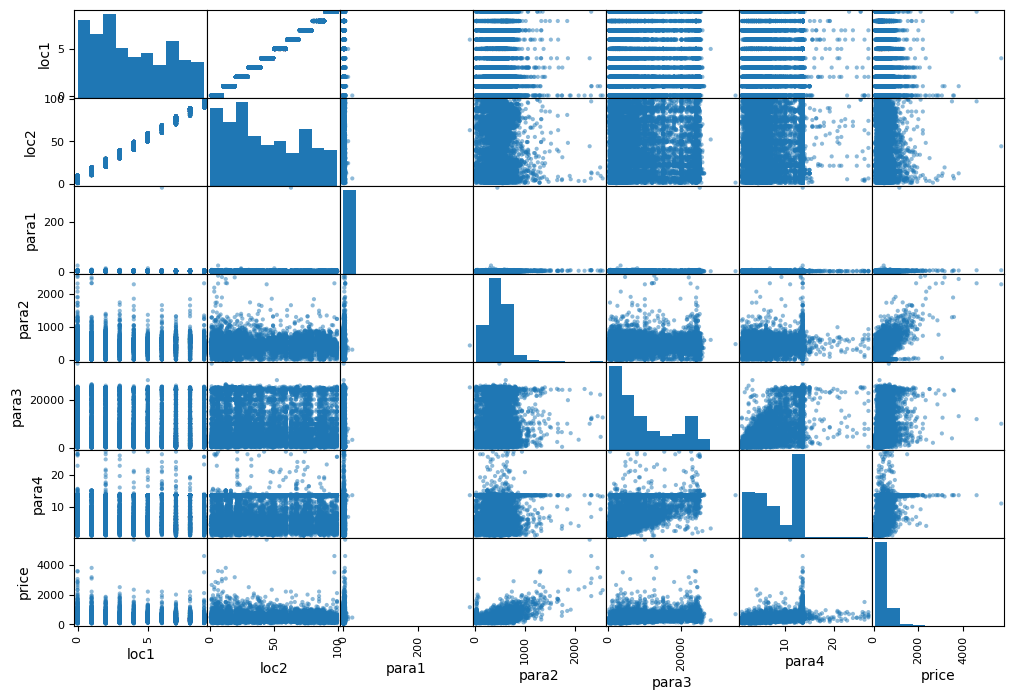

In [ ]:
from pandas.plotting import scatter_matrix

# Suppress the output of the scatter_matrix function
_ = scatter_matrix(result.iloc[:,0:7], figsize=(12, 8))

In [ ]:
pd.DataFrame(abs(result.corr()["price"])).sort_values(by = "price", ascending = False)[1::]

,price
para2,0.551222
para4,0.517614
para3,0.356949
para1,0.074555
loc1,0.044079
loc2,0.043543
Wed,0.026684
Fri,0.025674
Mon,0.021734
Thu,0.019656


In [ ]:
result.drop(columns = "loc2", inplace = True)

In [ ]:
result.iloc[:,0:6]

,loc1,para1,para2,para3,para4,price
0,0,1,662,3000.0,3.8,73.49
1,9,1,340,2760.0,9.2,300.00
2,0,0,16,2700.0,3.0,130.00
3,4,1,17,12320.0,6.4,365.00
4,5,1,610,2117.0,10.8,357.50
...,...,...,...,...,...,...
9995,9,3,386,5000.0,12.0,460.00
9996,7,1,386,3250.0,8.0,325.00
9997,0,0,190,8856.0,5.6,133.33
9998,7,3,717,5000.0,13.6,820.00


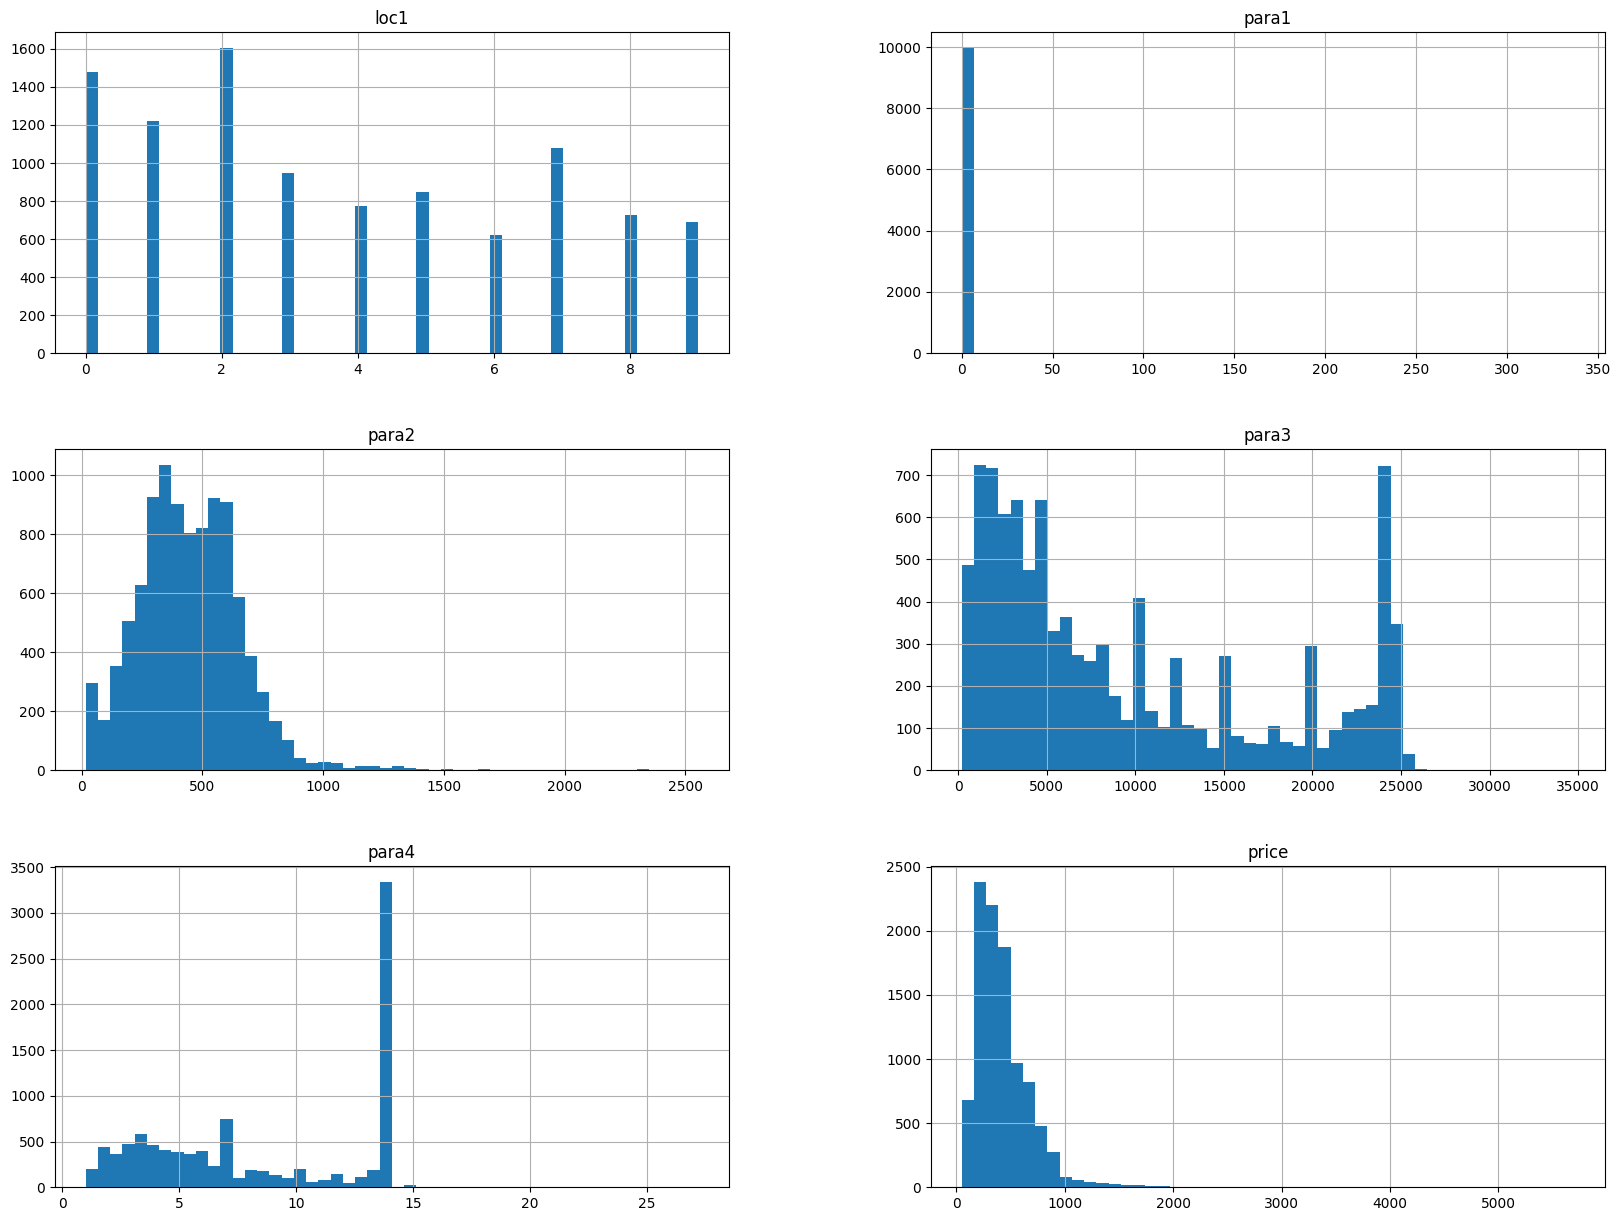

In [ ]:
import matplotlib.pyplot as plt
result.iloc[:,0:6].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
result.iloc[:,0:6].describe()

,loc1,para1,para2,para3,para4,price
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,3.793355,1.379966,446.888522,9550.105894,8.460614,433.318379
std,2.892286,3.501891,220.141080,8022.655794,4.613156,276.743453
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,1.000000,301.000000,2900.000000,4.000000,250.000000
50%,3.000000,1.000000,434.000000,6448.000000,7.200000,370.000000
75%,6.000000,1.000000,582.000000,15000.000000,13.600000,550.000000
max,9.000000,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [ ]:
result.iloc[:,0:6].sort_values(by = "para1", ascending = False).head(5)

,loc1,para1,para2,para3,para4,price
7196,6,337,442,25000.0,13.6,1150.0
1561,0,24,314,3360.0,13.6,450.0
4522,2,13,363,7920.0,13.2,490.0
8328,5,13,292,2528.0,6.8,350.0
5928,2,9,413,7260.0,13.6,530.0


In [ ]:
result["para1"].value_counts()

,count
para1,
1,7052
3,1609
0,836
2,265
4,164
5,51
6,6
7,3
13,2


In [ ]:
result = result[result["para1"] < 10]

**Feature Selection**


5 Best

In [ ]:
five_best = []
df_5 = pd.DataFrame(result.corr()["price"]).sort_values(by = "price", ascending = False)
df_5 = df_5.drop(df_5.index[0]).head(5)
for i in range(len(df_5)):
    five_best.append(df_5.index[i])

In [ ]:
five_best

['para2', 'para4', 'para3', 'para1', 'Fri']

In [ ]:
three_best = []
df_3 = pd.DataFrame(result.corr()["price"]).sort_values(by = "price", ascending = False)
df_3 = df_3.drop(df_3.index[0]).head(3)
for i in range(len(df_3)):
    three_best.append(df_3.index[i])

In [ ]:
three_best

['para2', 'para4', 'para3']

**Machine Learning**


*Regression Models*

In [ ]:
feature_sets = {
    "full_dataset": result.drop(columns=['price']),
    "three_best": result[three_best],
    "five_best": result[five_best],

}

In [ ]:
regression_models = {
    "Ridge" : linear_model.Ridge(random_state = 42),
    "DecisionTree" : tree.DecisionTreeRegressor(random_state = 42, max_depth=6),
    "RandomForest" : RandomForestRegressor(random_state = 42),
    "XGBoost": XGBRegressor(random_state = 42),
    "LGBM": LGBMRegressor(random_state = 42),
    "MLP":  MLPRegressor(random_state = 42),
}

In [ ]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):

    model.fit(x_train,y_train)

    y_predict=model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict)

    y_predict =model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict)

    y_predict=model.predict(x_train)
    r2 = r2_score(y_train, y_predict)

    if verbose:
        print("----Model name = {}-----".format(model_name))
        print("Train error = "'{}'.format(train_error))
        print("Test error = "'{}'.format(test_error))
        print("r2_score = "'{}'.format(r2))
        print("--------------------------------")

    trained_model = model

    return trained_model, y_predict, train_error, test_error, r2

In [ ]:
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Test Error": [],
    "R2" : []
}

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
for feature_set_name in feature_sets.keys():

    feature_set = feature_sets[feature_set_name]
    print("Included columns are {}".format(feature_set_name))
    for model_name in regression_models.keys():

        y = result["price"]
        x = feature_set
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


        trained_model, y_predict, train_error, test_error, r2 = make_regression(x_train, y_train, x_test, y_test, regression_models[model_name], model_name, verbose=True)


        pred_dict["regression_model"].append(model_name)
        pred_dict["feature_set"].append(feature_set_name)
        pred_dict["Train Error"].append(train_error)
        pred_dict["Test Error"].append(test_error)
        pred_dict["R2"].append(r2)

Included columns are full_dataset
----Model name = Ridge-----
Train error = 34076.53993808093
Test error = 30283.503600254335
r2_score = 0.5581137570721937
--------------------------------
----Model name = DecisionTree-----
Train error = 20583.9460012897
Test error = 28662.7266453193
r2_score = 0.7330784586795994
--------------------------------
----Model name = RandomForest-----
Train error = 3335.723053582752
Test error = 23829.768875251804
r2_score = 0.9567441374542804
--------------------------------
----Model name = XGBoost-----
Train error = 6517.395420833082
Test error = 24394.77205806087
r2_score = 0.9154859213576304
--------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 7991, number of u

In [ ]:
pred_df = pd.DataFrame(pred_dict)
pred_df.head(5)

,regression_model,feature_set,Train Error,Test Error,R2
0,Ridge,full_dataset,34076.539938,30283.503600,0.558114
1,DecisionTree,full_dataset,20583.946001,28662.726645,0.733078
2,RandomForest,full_dataset,3335.723054,23829.768875,0.956744
3,XGBoost,full_dataset,6517.395421,24394.772058,0.915486
4,LGBM,full_dataset,15417.595752,22164.009752,0.800073


In [ ]:
pred_df["feature_set_2"] = pred_df["feature_set"].apply(lambda x: x.split('_')[0])

In [ ]:
pred_df["Model_with_Data_set"] = pred_df['regression_model'] +"_"+ pred_df["feature_set_2"]

In [ ]:
df_barh = pred_df[["Train Error","Test Error", "R2", "Model_with_Data_set" ]]

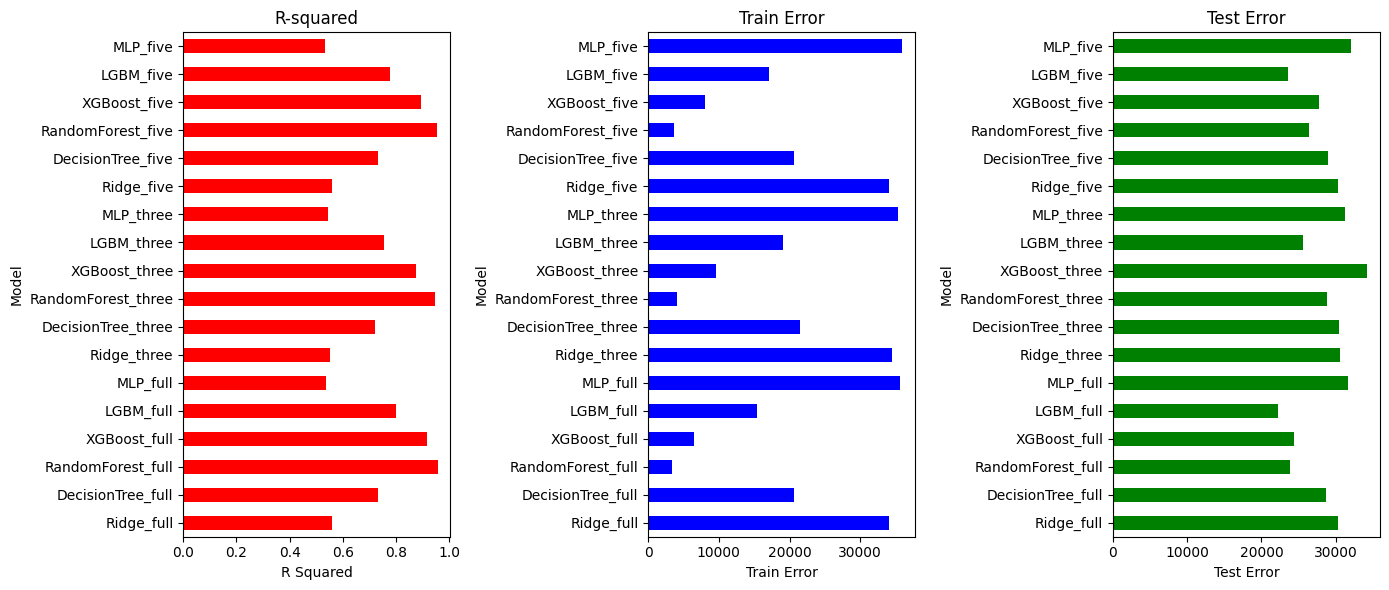

In [ ]:
df_train_error = df_barh[['Model_with_Data_set', 'Train Error']]
df_test_error = df_barh[['Model_with_Data_set', 'Test Error']]

# Create a figure and subplots
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(14, 6))


# Create the first graph
df_barh.plot(kind='barh', x='Model_with_Data_set', y='R2', color='red', ax=ax2, legend=False)
ax2.set_xlabel('R Squared')
ax2.set_ylabel('Model')
ax2.set_title('R-squared')

# Create the second graph
df_train_error.plot(kind='barh', x='Model_with_Data_set', y='Train Error', color='blue', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_ylabel('Model')
ax3.set_title('Train Error')


# Create the second graph
df_test_error.plot(kind='barh', x='Model_with_Data_set', y='Test Error', color='green', ax=ax4, legend=False)
ax4.set_xlabel('Test Error')
ax4.set_ylabel('Model')
ax4.set_title('Test Error')

# Fit the figure
plt.tight_layout()

# Show the figure
plt.show()

In [ ]:
pred_df.drop(columns=['feature_set_2', 'Model_with_Data_set'], inplace=True)

**Model Evaluation**


Highest R Squared

In [ ]:
pred_df.sort_values(by = "R2", ascending = False).head(5)

,regression_model,feature_set,Train Error,Test Error,R2
2,RandomForest,full_dataset,3335.723054,23829.768875,0.956744
14,RandomForest,five_best,3621.833146,26426.067980,0.953034
8,RandomForest,three_best,4101.463881,28860.026361,0.946814
3,XGBoost,full_dataset,6517.395421,24394.772058,0.915486
15,XGBoost,five_best,8020.521381,27690.580482,0.895994


Min Test Error

In [ ]:
pred_df.sort_values(by = "Test Error", ascending = True).head(5)

,regression_model,feature_set,Train Error,Test Error,R2
4,LGBM,full_dataset,15417.595752,22164.009752,0.800073
16,LGBM,five_best,17035.936081,23615.196051,0.779087
2,RandomForest,full_dataset,3335.723054,23829.768875,0.956744
3,XGBoost,full_dataset,6517.395421,24394.772058,0.915486
10,LGBM,three_best,19005.955760,25642.456835,0.753541


Min Train Error

In [ ]:
pred_df.sort_values(by = "Train Error", ascending = True).head(5)

,regression_model,feature_set,Train Error,Test Error,R2
2,RandomForest,full_dataset,3335.723054,23829.768875,0.956744
14,RandomForest,five_best,3621.833146,26426.067980,0.953034
8,RandomForest,three_best,4101.463881,28860.026361,0.946814
3,XGBoost,full_dataset,6517.395421,24394.772058,0.915486
15,XGBoost,five_best,8020.521381,27690.580482,0.895994


Grid Search in Random Forest

In [ ]:
x = result.drop(columns=['price'])
y = result["price"]

x_train, x_test, y_train, y_test = train_test_split(
x, y,
test_size=0.2, random_state=42
)

model = RandomForestRegressor(random_state=42)

model_name = "Random Forest"

model.fit(x_train,y_train)

y_predict=model.predict(x_train)
train_error_f = mean_squared_error(y_train, y_predict)

y_predict =model.predict(x_test)
test_error_f = mean_squared_error(y_test, y_predict)

y_predict=model.predict(x_train)
r2_f = r2_score(y_train, y_predict)


print("----Model name = {}-----".format(model_name))
print("Train error = "'{}'.format(train_error_f))
print("Test error = "'{}'.format(test_error_f))
print("r2_score = "'{}'.format(r2_f))
print("--------------------------------")

----Model name = Random Forest-----
Train error = 3335.723053582752
Test error = 23829.768875251804
r2_score = 0.9567441374542804
--------------------------------


In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [54]:
from sklearn.metrics import get_scorer_names
# Get a list of available scorer names
available_scorers = get_scorer_names()
# You can print the list to see the available options
# print(available_scorers)
# To get a specific scorer object, you would typically use it within scikit-learn functions
# like cross_val_score or GridSearchCV by passing the scorer name as a string.
# For example:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# cross_val_score(model, X, y, scoring='neg_mean_squared_error')

In [55]:
sklearn.metrics.SCORERS.keys()

AttributeError: module 'sklearn.metrics' has no attribute 'SCORERS'